In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import torchvision

import os
import sys
sys.path.insert(0, "../utils")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from tqdm import tqdm

import cityscapes_loader
import train_eval
import importlib

In [2]:
importlib.reload(cityscapes_loader)

dataset_root_dir = "/home/nfs/inf6/data/datasets/cityscapes/"

train_ds = cityscapes_loader.cityscapesLoader(root=dataset_root_dir, split='train', img_size=(512, 1024), is_transform=True, is_sequence=True)
val_ds = cityscapes_loader.cityscapesLoader(root=dataset_root_dir, split='val', img_size=(1024, 2048), is_transform=True, is_sequence=True)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=3, shuffle=True, drop_last=True)
valid_loader = torch.utils.data.DataLoader(val_ds, batch_size=3, shuffle=False, drop_last=True)

Found 1885 train images
Found 235 val images


In [3]:
import UNet_Template
import importlib
importlib.reload(UNet_Template)

config = UNet_Template.RNN_UNetConfig(out_channels=30)

rnn_unet = UNet_Template.RNN_UNet(config)

rnn_unet_optim = torch.optim.Adam(rnn_unet.parameters(), lr=3e-4)

criterion = nn.CrossEntropyLoss()

30 [[512, 256, 256], [256, 128, 128], [128, 64, 64]] False True


In [4]:
importlib.reload(train_eval)

epochs=10
rnn_unet_trainer = train_eval.Trainer(
    rnn_unet, rnn_unet_optim, criterion, train_loader, valid_loader, "cityscapes", epochs, sequence=False, all_labels=31, start_epoch=0)

/home/user/schwemme/CudaLab_Project/src/tboard_logs/RNN_UNet


In [5]:
rnn_unet_trainer.train_model()

torch.Size([12, 3, 1024, 2048])
torch.Size([12, 3, 1024, 2048])
torch.Size([12, 3, 1024, 2048])
normal shape:  torch.Size([3, 12, 3, 1024, 2048])
image with gt idx  

../aten/src/ATen/native/cuda/IndexKernel.cu:92: operator(): block: [111,0,0], thread: [0,0,0] Assertion `index >= -sizes[i] && index < sizes[i] && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/IndexKernel.cu:92: operator(): block: [111,0,0], thread: [1,0,0] Assertion `index >= -sizes[i] && index < sizes[i] && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/IndexKernel.cu:92: operator(): block: [111,0,0], thread: [2,0,0] Assertion `index >= -sizes[i] && index < sizes[i] && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/IndexKernel.cu:92: operator(): block: [111,0,0], thread: [3,0,0] Assertion `index >= -sizes[i] && index < sizes[i] && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/IndexKernel.cu:92: operator(): block: [111,0,0], thread: [4,0,0] Assertion `index >= -sizes[i] && index < sizes[i] && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/IndexKernel.cu:92: operator(): block: [111,0,0], thread: [5,0,0] Assertion `index

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

torch.Size([1, 512, 1024])


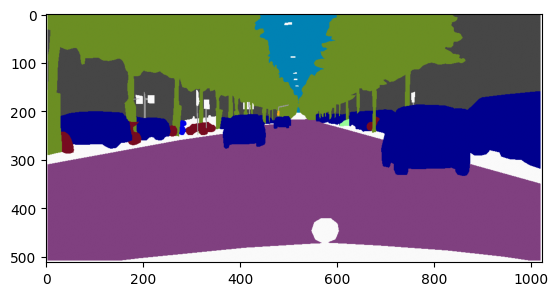

In [ ]:
test_label = label[1]
print(test_label.shape)
test_label = val_ds.decode_segmap(test_label.numpy()[0])
# display the image
plt.imshow(test_label)

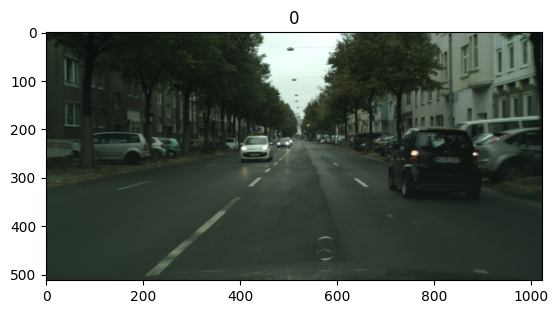

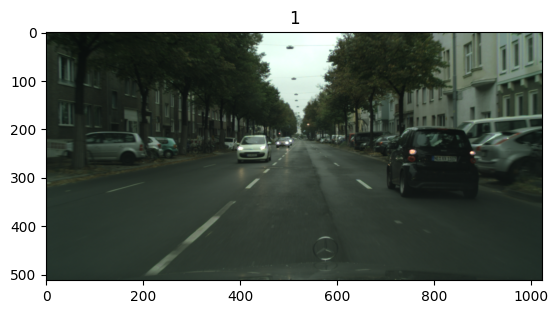

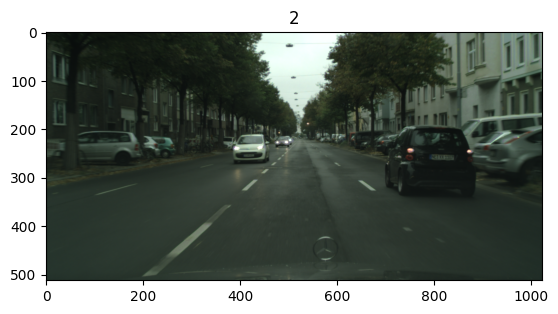

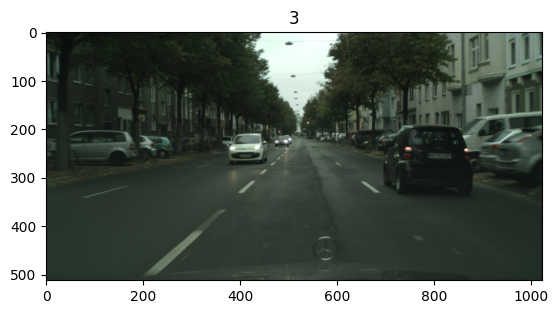

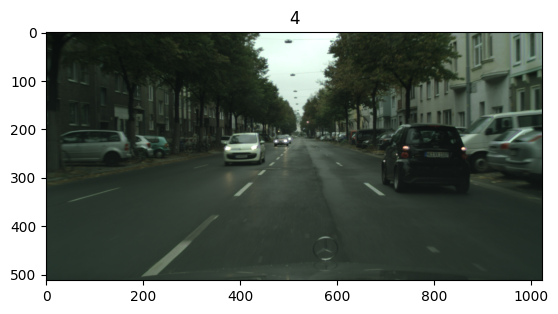

In [ ]:
def display_seq(seq):
    for i in range(seq.shape[0]):
        img = seq[i]
        mean = torch.tensor([0.485, 0.456, 0.406]).view( 3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        img = img * std + mean
        img = img.cpu().permute(1, 2, 0).numpy()
        plt.imshow(img)
        # add number 
        plt.title(i)
        plt.show()

display_seq(img)